# Regression

In this guide, you'll learn how to use `sklearn` and `sklearn-evaluation` to fit and evaluate a regression model. Regression analysis is a set of statistical methodologies for determining the relationship between a dependent (or outcome) variable and one or more independent variables (also known as predictor variables). The most common algorithm used is Linear Regression. 

Linear Regression is a supervised learning technique that attempts to fit the best line that reduces the discrepancies between the predicted and the actual target value. This best fit line is arrived at by aiming to reduce the MSE (Mean Square Error).

Let's import the required libraries and read the dataset.

In [1]:
import urllib.request
import pandas as pd

# download dataset
# Reference: https://www.kaggle.com/datasets/mirichoi0218/insurance


url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"  # noqa
urllib.request.urlretrieve(url, filename="insurance.csv")

data = pd.read_csv("insurance.csv")

## Analyse the dataset

In [2]:
data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Transform non-numerical labels to numerical labels.

In [3]:
from sklearn.preprocessing import LabelEncoder

# sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates())
data.sex = le.transform(data.sex)

# smoker or not
le.fit(data.smoker.drop_duplicates())
data.smoker = le.transform(data.smoker)

# region
le.fit(data.region.drop_duplicates())
data.region = le.transform(data.region)

Let's visualise the correlation among the variables.

<Axes: >

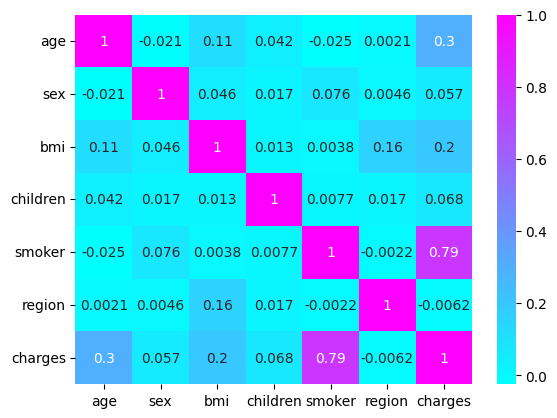

In [4]:
import seaborn as sns

sns.heatmap(data.corr(), annot=True, cmap="cool")

A strong correlation is observed with the smoking aspect of the patient. Now let's train a linear regression model on the data.

## Train the model

In [5]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = data.drop(["charges"], axis=1)
y = data.charges

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model = LinearRegression().fit(X_train, y_train)

In [6]:
y_pred = model.predict(X_test)
print(r2_score(y_test, y_pred))

0.7962732059725786


## Residual Plot

R2 score measures how well the model fits the data. But we need other approaches as well to analyse the results. 

A residual is an error between the predicted value and the actual observed value (Observed - Predicted). A residual plot visualises the residuals on the Y-axis and the predicted values on the X-axis. A good residual plot should have the following characteristics:

- Points should cluster more towards the centre of the plot.
- The density of points is more towards the origin as compared to away from the origin.
- There shouldn't be any clear pattern in the distribution of the points.

We can see that the below residual plot is fairly decent.

<Axes: title={'center': 'Residuals Plot'}, xlabel='Predicted Value', ylabel='Residuals'>

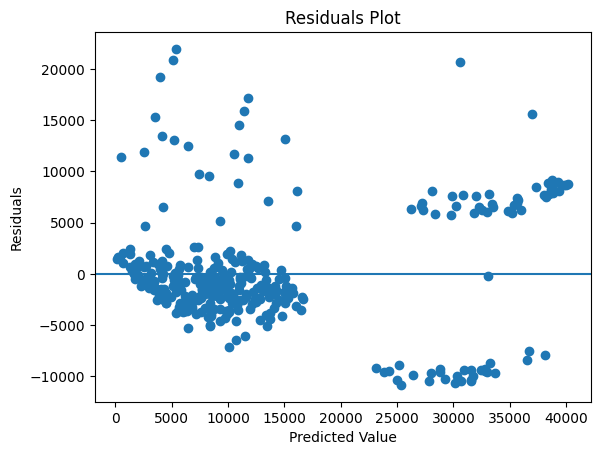

In [7]:
from sklearn_evaluation import plot

plot.residuals(y_test, y_pred)

## Prediction Error Plot

Another diagnostic tool to analyse the regression model is the prediction error plot. This plot visualises the observed target values against the values predicted by the model. 
The identity line represents the best case scenario where every predicted outcome is accurate. 
The best fit line represents the trend in the actual predicted outcomes.
The closer the best fit and the identity lines, the better the correlation between the predicted and the actual outcome.

From the below plot we can see there is a fairly small deviation between the best fit and the identity lines, hence the model performance is good.

<Axes: title={'center': 'Prediction Error'}, xlabel='y_true', ylabel='y_pred'>

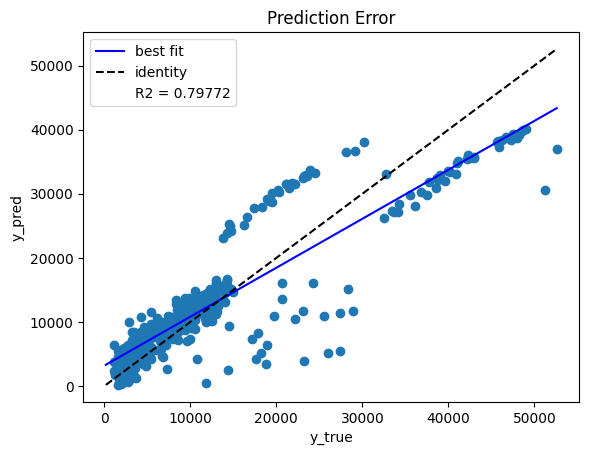

In [8]:
plot.prediction_error(y_test, y_pred)

## Outlier Detection 

Outliers are data points that vary significantly from the rest of the data points in the training set. The presence of outliers in the training phase can affect the parameters that the model learns, thereby affecting model performance. 
Cook's distance measures how much a regression model changes when a particular data point is removed from the dataset. From the plot we can see that the large spikes are the data points that can influence the model and affect the results significantly. Removal of these outlier points should be done after careful inspection.

The following guidelines will help you understand how to deal with outliers:
- If the data point can be determined as erroneous, remove it. This can happen if typos are made during data entry, or experiments are not run properly.
- If the data point doesn't belong to the target population and has been mistakenly added while sampling, then remove it.
- The outlying data point may be a natural variation in the dataset. It should not be removed unless a thorough investigation is done.

<Axes: title={'center': "Cook's Distance Outlier Detection"}, xlabel='instance index', ylabel='influence (I)'>

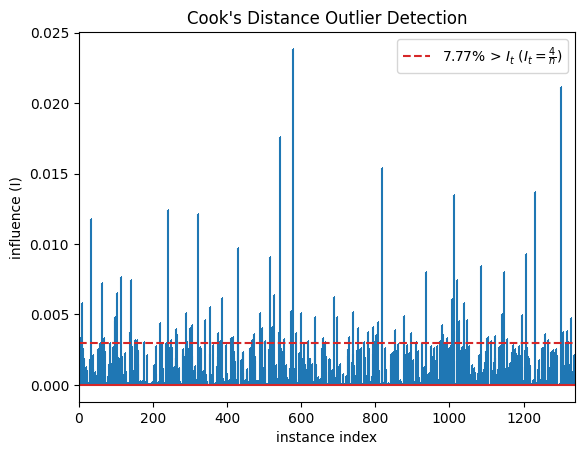

In [9]:
plot.cooks_distance(X, y)